# netremCV
Cross-validation approach for estimating the optimal $\beta_{net}$ and $\alpha_{lasso}$.

Selection for $\beta_{net}$ can impact the optimal values for $\alpha_{net}$

In [1]:
from DemoDataBuilderXandY import generate_dummy_data
from Netrem_model_builder import netrem, netremCV
import PriorGraphNetwork as graph
import error_metrics as em 
import essential_functions as ef
import netrem_evaluation_functions as nm_eval

dummy_data = generate_dummy_data(corrVals = [0.9, 0.5, 0.3, -0.2, -0.8],
                                 num_samples_M = 100000,
                                 train_data_percent = 70)

:) same_train_test_data = False
Please note that since we hold out 30.0% of our 100000 samples for testing, we have:
X_train = 70000 rows (samples) and 5 columns (N = 5 predictors) for training.
X_test = 30000 rows (samples) and 5 columns (N = 5 predictors) for testing.
y_train = 70000 corresponding rows (samples) for training.
y_test = 30000 corresponding rows (samples) for testing.


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1659.80it/s]


In [2]:
# 70 samples for training data (used to train and fit GRegulNet model)
X_train = dummy_data.view_X_train_df()
y_train = dummy_data.view_y_train_df()

# 30 samples for testing data
X_test = dummy_data.view_X_test_df()
y_test = dummy_data.view_y_test_df()

In [3]:
# prior network edge_list:
edge_list = [["TF1", "TF2", 0.9], ["TF4", "TF5", 0.75], ["TF1", "TF3"], ["TF1", "TF4"], ["TF1", "TF5"], 
             ["TF2", "TF3"], ["TF2", "TF4"], ["TF2", "TF5"], ["TF3", "TF4"], ["TF3", "TF5"]]
edge_list

[['TF1', 'TF2', 0.9],
 ['TF4', 'TF5', 0.75],
 ['TF1', 'TF3'],
 ['TF1', 'TF4'],
 ['TF1', 'TF5'],
 ['TF2', 'TF3'],
 ['TF2', 'TF4'],
 ['TF2', 'TF5'],
 ['TF3', 'TF4'],
 ['TF3', 'TF5']]

In [4]:
# beta_network_val = 3 
# # by default, model_type is Lasso, so alpha_lasso_val will be specified for the alpha_lasso parameter. (Otherwise, if model_type is LassoCV, alpha_lasso is determined by cross-validation on training data).
# alpha_lasso_val = 0.01

# # Building the network regularized regression model: 
# # Please note: To include nodes found in the gene expression data that are not found in the PPI Network (e.g. TF6 in our case), we use False for the overlapped_nodes_only argument (otherwise, we would only use TFs 1 to 5):
netrem_demo = netrem(edge_list = edge_list, 
                     beta_net = beta_network_val,
                     alpha_lasso = alpha_lasso_val,
                     view_network = True)

In [5]:
# Fitting the NetREm model on training data: X_train and y_train:
netrem_demo.fit(X_train, y_train)
netrem_demo

NameError: name 'netrem_demo' is not defined

In [ ]:
netrem_demo.model_nonzero_coef_df

In [4]:
%%time 

netrem_demoCV = netremCV(edge_list = edge_list, X = X_train, y = y_train) 
netrem_demoCV

:) using variance to define beta_net values


:) Generating beta_net and alpha_lasso pairs:   0%|          | 0/50 [00:00<?, ?it/s]

:) Performing NetREmCV with both beta_network and alpha_lasso as UNKNOWN.


  0%|          | 0/50 [00:00<?, ?it/s]

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END alpha_lasso=0.05169459043415155, beta_net=115.06396943803561; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=115.06396943803561; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=115.06396943803561; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=115.06396943803561; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=115.06396943803561; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=104.74252173191597; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=104.74252173191597; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=104.74252173191597; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=104.74252173191597; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=104.74252173191597; total time=   0.0s
[CV] END alpha_lasso=0.051694590434151

[CV] END alpha_lasso=0.05169459043415155, beta_net=21.19558826533325; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=21.19558826533325; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=19.294305379391336; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=19.294305379391336; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=19.294305379391336; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=19.294305379391336; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=19.294305379391336; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=17.563571032471952; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=17.563571032471952; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=17.563571032471952; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=17.563571032471952; total time=   0.0s
[CV] END alp

[CV] END alpha_lasso=0.05169459043415155, beta_net=3.5541460518395698; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=3.5541460518395698; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=3.5541460518395698; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=3.5541460518395698; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=3.5541460518395698; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=3.235332675305321; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=3.235332675305321; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=3.235332675305321; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=3.235332675305321; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=3.235332675305321; total time=   0.0s
[CV] END alpha_lasso=0.05169459043415155, beta_net=2.945117439526871; total time=   0.0s
[CV] END alpha_l

NetREmModel(overlapped_nodes_only=False, all_pos_coefs=False, y_intercept=False, max_lasso_iterations=10000, view_network=False, tolerance=0.0001, lasso_selection=cyclic, beta_net=1.150639694380356, alpha_lasso=0.05169459043415155, network=<PriorGraphNetwork.PriorGraphNetwork object at 0x00000189D2C5A4A0>)

In [5]:
netrem_demoCV

NetREmModel(overlapped_nodes_only=False, all_pos_coefs=False, y_intercept=False, max_lasso_iterations=10000, view_network=False, tolerance=0.0001, lasso_selection=cyclic, beta_net=1.150639694380356, alpha_lasso=0.05169459043415155, network=<PriorGraphNetwork.PriorGraphNetwork object at 0x00000189D2C5A4A0>)

In [6]:
netrem_demoCV.get_params()

{'info': 'NetREm Model',
 'alpha_lasso': 0.05169459043415155,
 'beta_net': 1.150639694380356,
 'y_intercept': False,
 'model_type': 'Lasso',
 'max_lasso_iterations': 10000,
 'network': <PriorGraphNetwork.PriorGraphNetwork at 0x189d2c73040>,
 'verbose': False,
 'all_pos_coefs': False,
 'model_info': 'fitted_model :)',
 'target_gene_y': 'y',
 'tolerance': 0.0001,
 'lasso_selection': 'cyclic'}

In [7]:
netrem_demoCV.test_mse(X_train, y_train)

0.1372739768102679

In [8]:
netrem_demoCV.test_mse(X_test, y_test)

0.13781162327050378

In [9]:
netrem_demoCV.model_nonzero_coef_df

,y_intercept,TF1,TF2,TF3,TF5
0,None,0.277752,0.063378,0.00145,-0.159248


,y_intercept,TF1,TF2,TF3,TF4,TF5
0,None,0.177739,0.169009,0.004697,0.12723,0.119524


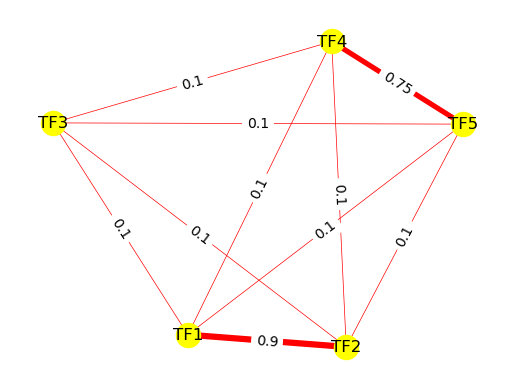

In [10]:
netrem_demo = netrem(edge_list = edge_list, 
                     beta_net = 723.7242660781212,
                     alpha_lasso = 0.05169459043415155,
                     view_network = True)
netrem_demo.fit(X_train, y_train)
netrem_demo.model_nonzero_coef_df

,y_intercept,TF1,TF2,TF3,TF4,TF5
0,None,0.255386,0.134025,0.002058,-0.016775,-0.118627


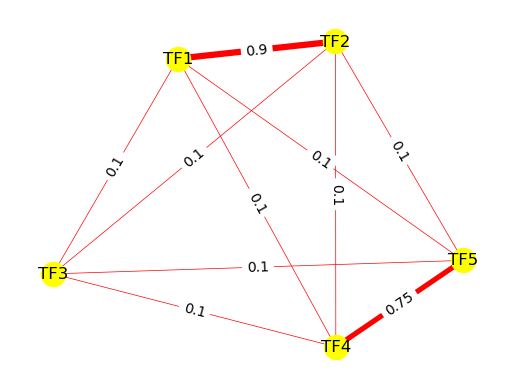

In [11]:
netrem_demo = netrem(edge_list = edge_list, 
                     beta_net = 10.7242660781212,
                     alpha_lasso = 0.05169459043415155,
                     view_network = True)
netrem_demo.fit(X_train, y_train)
netrem_demo.model_nonzero_coef_df

In [42]:
# 70 samples for training data (used to train and fit GRegulNet model)
X_train = dummy_data.view_X_train_df()
y_train = dummy_data.view_y_train_df()

# 30 samples for testing data
X_test = dummy_data.view_X_test_df()
y_test = dummy_data.view_y_test_df()
import pandas as pd
import numpy as np
overlapped_nodes_only = False
if isinstance(X_train, pd.DataFrame):
    X_df = X_train
    gene_names_list = list(X_df.columns)
    if overlapped_nodes_only:
        nodes_list = prior_network.nodes#self.nodes
        common_nodes = ef.intersection(gene_names_list, nodes_list)
        common_nodes.sort()

        X_df = X_df.loc[:, X_df.columns.isin(common_nodes)]
        # Reorder columns of dataframe to match order in `column_order`
        X_df = X_df.reindex(columns=common_nodes)
    else:
        X_df = X_df.reindex(columns=gene_names_list)
    X_train = np.array(X_df.values.tolist())
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()    
# beta_max = 0.5 * np.max(np.abs(X_train.T.dot(y_train)))
# beta_min = 0.01 * beta_max

beta_max = 0.1 * np.max(np.abs(X_train.T.dot(y_train)))
beta_min = 0.01 * beta_max

beta_max

14474.48532156243

In [45]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

In [46]:
beta_max = 0.1 * np.max(np.abs(X_train.T.dot(y_train)))
beta_max

14474.48532156243

In [44]:
var_X = np.var(X_train)
var_y = np.var(y_train)
if beta_max > 200:
    beta_max = 0.5 * np.max(np.abs(var_X * var_y)) * 100
    beta_min = 0.01 * beta_max
print(beta_min, beta_max)    

1.150639694380356 115.06396943803561


In [37]:
beta_min = 0.01 * beta_max
beta_min

1.150639694380356

In [39]:
# 70 samples for training data (used to train and fit GRegulNet model)
X_train = dummy_data.view_X_train_df()
y_train = dummy_data.view_y_train_df()

# 30 samples for testing data
X_test = dummy_data.view_X_test_df()
y_test = dummy_data.view_y_test_df()

,y_intercept,TF1,TF2,TF3,TF5
0,None,0.277752,0.063378,0.00145,-0.159248


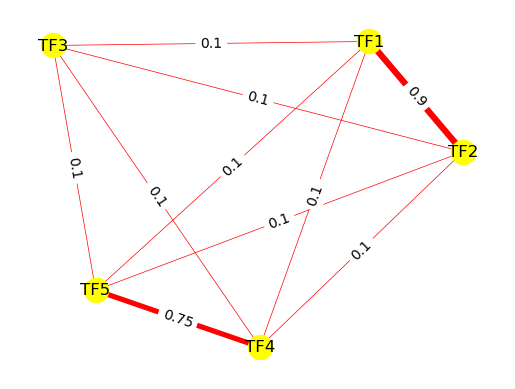

In [40]:
netrem_demo = netrem(edge_list = edge_list, 
                     beta_net = 1.150639694380356,
                     alpha_lasso = 0.05169459043415155,
                     view_network = True)
netrem_demo.fit(X_train, y_train)
netrem_demo.model_nonzero_coef_df

,y_intercept,TF1,TF2,TF3,TF4
0,None,0.204448,0.169132,0.003191,0.026999


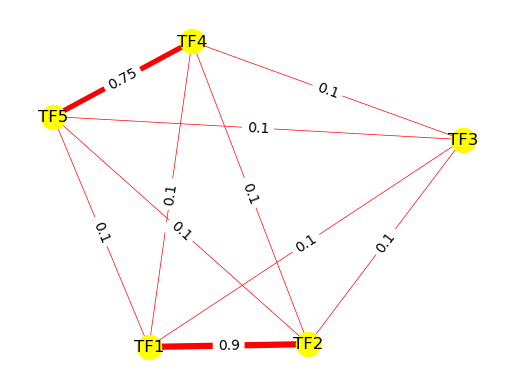

In [41]:
netrem_demo = netrem(edge_list = edge_list, 
                     beta_net = 115.06396943803561,
                     alpha_lasso = 0.05169459043415155,
                     view_network = True)
netrem_demo.fit(X_train, y_train)
netrem_demo.model_nonzero_coef_df

AttributeError: 'numpy.ndarray' object has no attribute 'sort_index'

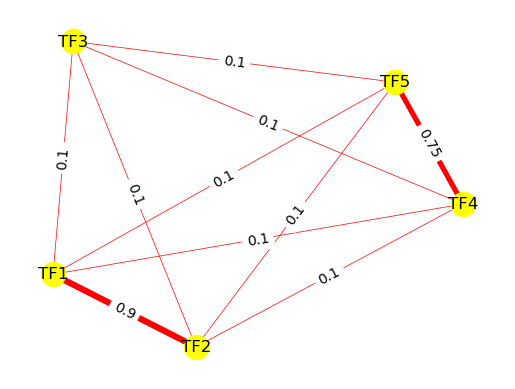

In [25]:
netrem_demo = netrem(edge_list = edge_list, 
                     beta_net = beta_min,
                     alpha_lasso = 0.05169459043415155,
                     view_network = True)
netrem_demo.fit(X_train, y_train)
netrem_demo.model_nonzero_coef_df

In [ ]:
# 70 samples for training data (used to train and fit GRegulNet model)
X_train = dummy_data.view_X_train_df()
y_train = dummy_data.view_y_train_df()

# 30 samples for testing data
X_test = dummy_data.view_X_test_df()
y_test = dummy_data.view_y_test_df()

In [ ]:
def generate_beta_networks(X_train, y_train, prior_network, overlapped_nodes_only = False, num = 10):
    """
    Generate a grid of beta_network values to transform X_train.

    Parameters:
    X_train (numpy array): training input data

    Returns:
    numpy array: grid of beta_network values
    """
    if isinstance(X_train, pd.DataFrame):
        X_df = X_train
        gene_names_list = list(X_df.columns)
        if overlapped_nodes_only:
            nodes_list = prior_network.nodes#self.nodes
            common_nodes = ef.intersection(gene_names_list, nodes_list)
            common_nodes.sort()

            X_df = X_df.loc[:, X_df.columns.isin(common_nodes)]
            # Reorder columns of dataframe to match order in `column_order`
            X_df = X_df.reindex(columns=common_nodes)
        else:
            X_df = X_df.reindex(columns=gene_names_list)
        X_train = np.array(X_df.values.tolist())
    if isinstance(y_train, pd.DataFrame):
        y_train = y_train.values.flatten()    
    beta_max = 0.5 * np.max(np.abs(X_train.T.dot(y_train)))
    beta_min = 0.01 * beta_max
    return np.logspace(np.log10(beta_max), np.log10(beta_min), num=num)